In [16]:
%autosave 10
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Autosaving every 10 seconds


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [4]:
df = pd.read_csv('cleaned_data.csv')
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split( df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month']. values, test_size=0.2, random_state=24) 

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [9]:
example_lr = LogisticRegression(solver= 'lbfgs') # 'lbfgs' handle L2 or no penalty
example_lr.fit(X_train_2, y_train_2)

LogisticRegression()

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [10]:
y_test_2_pred_proba = example_lr.predict_proba(X_test_2)

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [13]:
metrics.roc_auc_score(y_test_2, y_test_2_pred_proba[:,1])


0.6201990844642832

 The AUC is higher. This may be because now we are using a feature that has something to do with an account's financial status (credit limit), to predict something else related to the account's financial status (whether or not it will default), instead of using something less directly related to finances. 

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve for logistic regression with LIMIT_BAL feature')

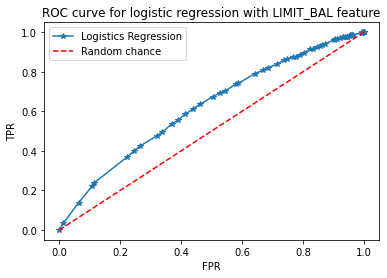

In [27]:
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2, y_test_2_pred_proba[:,1])
plt.plot(fpr_2, tpr_2, '*-')
plt.plot([0,1], [0,1],'r--')
plt.legend(['Logistics Regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR') 
plt.title('ROC curve for logistic regression with LIMIT_BAL feature') 

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [28]:
precision, recall, thresh_3 = \
metrics.precision_recall_curve(y_test_2, y_test_2_pred_proba[:,1])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


(0.0, 1.0)

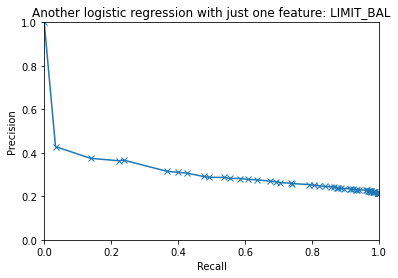

In [36]:
plt.plot(recall, precision, '-x') 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Another logistic regression with just one feature: LIMIT_BAL') 
plt.xlim([0, 1]) 
plt.ylim([0, 1])


_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [37]:
metrics.auc(recall, precision) 

0.31566964427378624

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [38]:
# to calculate predicted probabilities using the training data
y_train_2_pred_proba = example_lr.predict_proba(X_train_2) 
metrics.roc_auc_score(y_train_2, y_train_2_pred_proba[:,1]) 

0.6182918113358344

    How is this different, conceptually and quantitatively, from your earlier calculation?


* When we calculate this metric on the training data, we are measuring the model's skill in predicting the same data that "taught" the model how to make predictions. We are seeing how well the model fits the data.
* When we compare this to a testing data metric, we are comparing training and testing scores. If there was much of a difference in these scores, which usually would come in the form of a higher training score than testing score, it would indicate that while the model fits the data well, the trained model does not generalize well to new, unseen data.
* In this case, the training and testing scores are similar, meaning the model does about as well on out-of-sample data as it does on the same data used in model training